# Housing Price Data Analysis

In [23]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [24]:
#load data
house_data = pd.read_csv("Housing.csv")

In [25]:
#show data
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


I will drop columns I won't be using/don't deem nessesary.

In [26]:
house_data = house_data.drop(['hotwaterheating','airconditioning','parking'], axis =1)

Check data quality and completeness.

In [27]:
house_data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
prefarea              2
furnishingstatus      3
dtype: int64

We various columns that have yes or no values.

In [28]:
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
prefarea            0
furnishingstatus    0
dtype: int64

We have no NaN or empty values in our data.

Let's recode our yes or no data to 1's or 0's.

In [29]:
#function to recode values into 1's and 0's
#don't run this part till after EDA
# house_data = house_data.replace({'mainroad': {'yes': 1,'no' : 0}})
# house_data = house_data.replace({'guestroom': {'yes': 1,'no' : 0}})
# house_data = house_data.replace({'basement': {'yes': 1,'no' : 0}})
# house_data = house_data.replace({'prefarea': {'yes': 1,'no' : 0}})

house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,furnished
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,furnished


Now that our data has been checked for quality and clean we can now preform EDA.

## Analysis

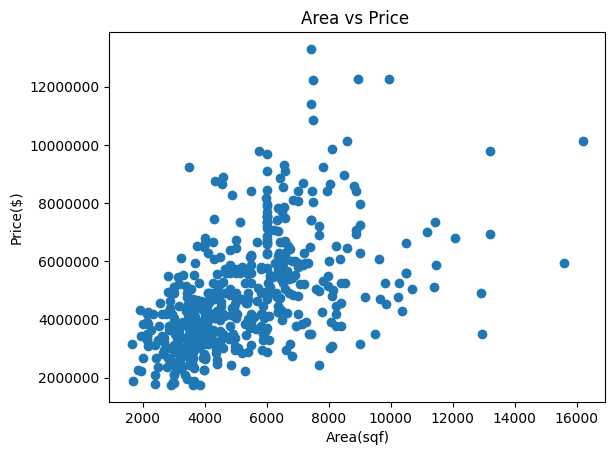

In [30]:
plt.scatter('area','price',data=house_data)
plt.title("Area vs Price ")
plt.xlabel('Area(sqf)')
plt.ylabel("Price($)")
plt.ticklabel_format(style='plain')
plt.show()

It seems there is a strong positive relationship between area and price.

Text(0.5, 1.0, '# of Stories vs Price')

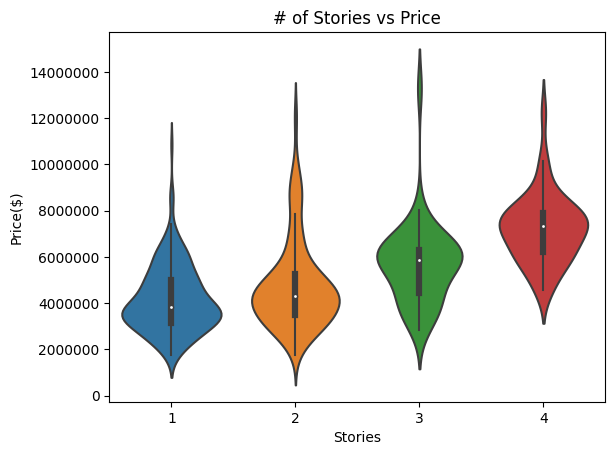

In [31]:

sns.violinplot(x='stories',y='price',data=house_data)
plt.xlabel('Stories')
plt.ticklabel_format(axis='y',style='plain')
plt.ylabel('Price($)')
plt.title('# of Stories vs Price')


There is a positive relationship between price and number of stories.

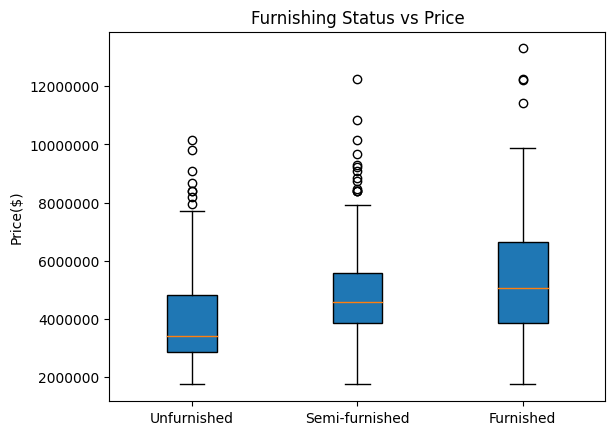

In [32]:
#plt.boxplot(house_data['price'],vert=True, labels= [''])

#categorizing data by furnishingstatus
dataUF = house_data['price'].loc[house_data['furnishingstatus'] == 'unfurnished']

dataSF = house_data['price'].loc[house_data['furnishingstatus'] == 'semi-furnished']

dataF = house_data['price'].loc[house_data['furnishingstatus'] == 'furnished']
data = [dataUF, dataSF, dataF]

#plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=['Unfurnished','Semi-furnished','Furnished'], patch_artist= True)
plt.ticklabel_format(axis='y',style='plain')
plt.ylabel('Price($)')
plt.title('Furnishing Status vs Price')


plt.show()

It seems that a house is likely to cost more if it is furnished.

[Text(0.5, 1.0, '# of Bedrooms vs Price'),
 Text(0.5, 0, '# of Bedrooms'),
 Text(0, 0.5, 'Price($)')]

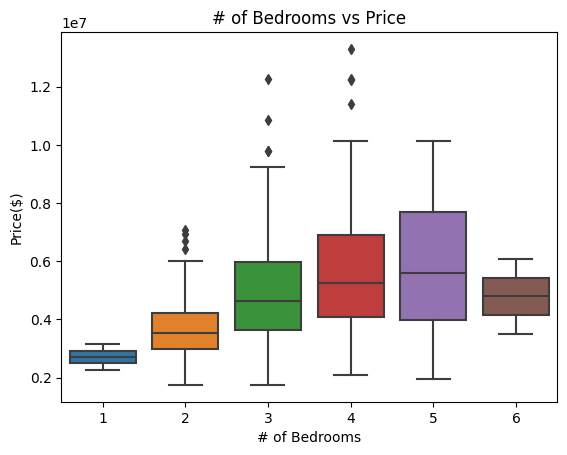

In [33]:

plot = sns.boxplot(data=house_data, x ='bedrooms', y = 'price')
plot.set(title = '# of Bedrooms vs Price',xlabel = '# of Bedrooms', ylabel= 'Price($)')


<AxesSubplot:xlabel='mainroad', ylabel='count'>

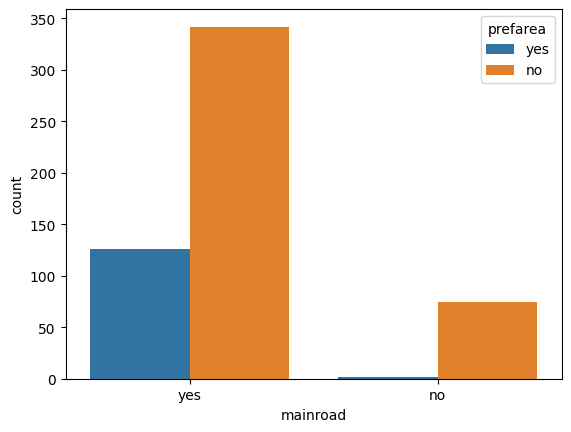

In [34]:
#make an aggregate graph with mainroad and pref area as specifics when doing price vs area
sns.countplot(x = 'mainroad',hue = 'prefarea',data = house_data)

The majority of homes in our data in a prefered area are located on a mainroad.

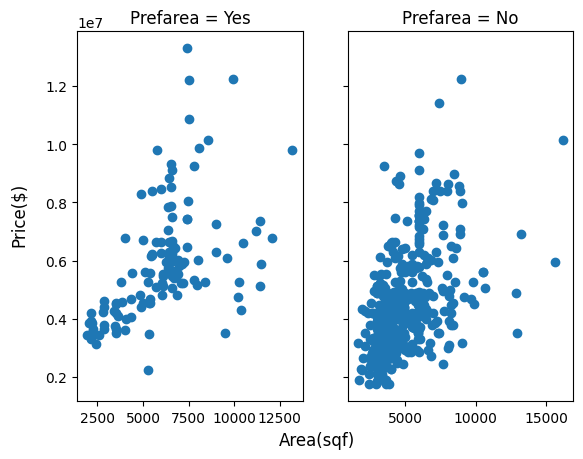

In [35]:
fig, axs = plt.subplots(1,2,sharey= True)
#seperating the data
df_yes = house_data.loc[house_data['prefarea']=='yes']
df_no = house_data.loc[house_data['prefarea']=='no']

#sets a common x and y label for both plots
fig.supxlabel('Area(sqf)')
fig.supylabel('Price($)')

#plotting
axs[0].scatter(df_yes['area'],df_yes['price'])
axs[0].set_title('Prefarea = Yes')

axs[1].scatter(df_no['area'],df_no['price'])
axs[1].set_title('Prefarea = No')

plt.show()

Houses in a preferred area have a higher price per square foot.

## Modelling

Based my findings above, I found that there was a positive relationship between area(sqf) and price($). I think it would be a good fit for a linear regression model. Below is an implementation of linear regression from scratch.

In [36]:
#Cost function implementation
def cost_function(m, b, house):
    
    total_cost = 0
    n= len(house)
    for i in range(len(house)):
        x = house.iloc[i].area
        y = house.iloc[i].price
        
        cost =  ((m*x+b)-y)**2
        total_cost = total_cost + cost
        
    total_cost = total_cost * (1/(2*n))
    return total_cost
        

In [37]:
#Gradient descent
def gradient_descent(m_cur, b_cur, points, L):
    de_dm = 0
    de_db = 0
    
    n= len(points)
    
    for i in range(n):
        x = points.iloc[i].area
        y = points.iloc[i].price
        
        de_dm += -(2/n) * x * (y- (m_cur * x + b_cur))
        de_db += -(2/n)  * (y- (m_cur * x + b_cur))
        
    m = m_cur - de_dm * L
    b = b_cur - de_db * L
    
    return m,b



Based on our findings above I will then apply gradient descent to find the best values for m and b. I have also picked a learning rate for our gradient descent.

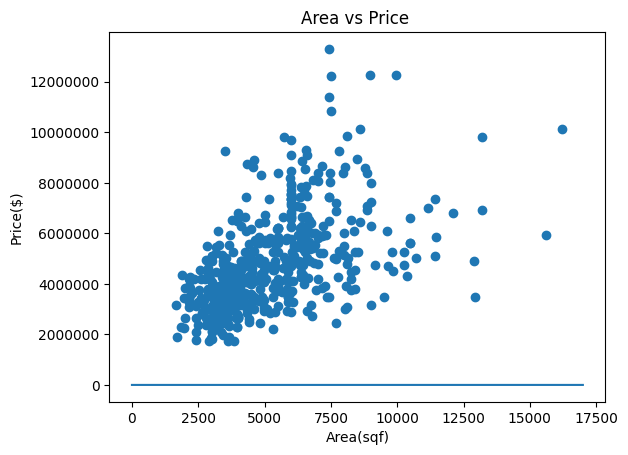

Cost: 13106916364659.268
iter: 0
iter: 50
iter: 100
iter: 150
iter: 200
iter: 250
iter: 300
iter: 350
iter: 400
iter: 450
iter: 500
iter: 550
iter: 600
iter: 650
iter: 700
iter: 750
iter: 800
iter: 850
iter: 900
iter: 950
iter: 1000
iter: 1050
iter: 1100
iter: 1150
iter: 1200
iter: 1250
iter: 1300
iter: 1350
iter: 1400
iter: 1450
iter: 1500
iter: 1550
iter: 1600
iter: 1650
iter: 1700
iter: 1750
iter: 1800
iter: 1850
iter: 1900
iter: 1950
iter: 2000
iter: 2050
iter: 2100
iter: 2150
iter: 2200
iter: 2250
iter: 2300
iter: 2350
iter: 2400
iter: 2450
iter: 2500
iter: 2550
iter: 2600
iter: 2650
iter: 2700
iter: 2750
iter: 2800
iter: 2850
iter: 2900
iter: 2950
iter: 3000
iter: 3050
iter: 3100
iter: 3150
iter: 3200
iter: 3250
iter: 3300
iter: 3350
iter: 3400
iter: 3450
iter: 3500
iter: 3550
iter: 3600
iter: 3650
iter: 3700
iter: 3750
iter: 3800
iter: 3850
iter: 3900
iter: 3950
iter: 4000
iter: 4050
iter: 4100
iter: 4150
iter: 4200
iter: 4250
iter: 4300
iter: 4350
iter: 4400
iter: 4450
iter: 45

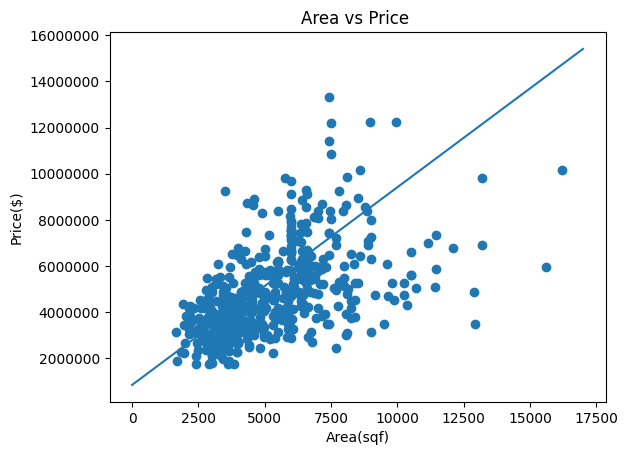

Cost: 1673369111971.7036


In [38]:


#setting linear equation
m=0
b=0
L = 0.00000001
iterations = 5000


#plotting data with inital guess
plt.scatter('area','price',data=house_data)
plt.plot([m* x + b for x in range(1000,18000)])
plt.title("Area vs Price ")
plt.xlabel('Area(sqf)')
plt.ylabel("Price($)")
plt.ticklabel_format(style='plain')
plt.show()


#display cost function of intial guess
print(f'Cost: {cost_function(m, b, house_data)}')

#applying gradient descent
for i in range(iterations):
    m, b =gradient_descent(m, b,house_data, L)
    #print iteration # every 50 iterations
    if(i % 50 ==0):
        print(f'iter: {i}')
print(f'M: {m}, B: {b}')

#plotting data after gradient descent
plt.scatter('area','price',data=house_data)
plt.plot([m* x + b for x in range(1000,18000)])
plt.title("Area vs Price ")
plt.xlabel('Area(sqf)')
plt.ylabel("Price($)")
plt.ticklabel_format(style='plain')
plt.show()
#display cost function after gradient descent
print(f'Cost: {cost_function(m, b, house_data)}')



#### Linear Regression with Sci-kit Learn

In [66]:
#training data
train_set, test_set = sk.model_selection.train_test_split(house_data,test_size = 0.2)
print(f'Train_set shape:{train_set.shape}')
print(f'Test_set shape:{test_set.shape}')
X = np.array(train_set['area']).reshape(-1,1)
Y = np.array(train_set['price']).reshape(-1,1)
regression = sk.linear_model.LinearRegression()
regression.fit(X,Y)

Train_set shape:(436, 10)
Test_set shape:(109, 10)


LinearRegression()

In [67]:
print(f'Regression coef:{regression.coef_}')
print(f'Regression intercept:{regression.intercept_}')

Regression coef:[[452.8433526]]
Regression intercept:[2454369.22704057]


In [73]:
X_test = np.array(test_set['area']).reshape(-1,1)
Y_test = np.array(test_set['price']).reshape(-1,1)

print(f'Coefficent of determination: {regression.score(X_test,Y_test)}')

Coefficent of determination: 0.27214396408082453


From the value of our cofficent of determination it seems our model is not the best choice in predicting prices based on area

In [69]:
test_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,prefarea,furnishingstatus
469,3010000,4600,2,1,1,yes,no,no,no,furnished
80,6629000,6000,3,1,2,yes,no,no,yes,semi-furnished
464,3080000,4500,2,1,2,yes,no,no,no,semi-furnished
472,3010000,3630,4,1,2,yes,no,no,no,semi-furnished
522,2380000,2475,3,1,2,yes,no,no,no,furnished


In [71]:
regression.predict([[4600]])

array([[4537448.64898192]])

In [72]:
regression.predict([[6000]])

array([[5171429.34261625]])